In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn import metrics
from textblob import TextBlob, Word

%matplotlib inline 

In [2]:
# import cleaned comments data from csv
df = pd.read_csv('comments_clean.csv')
df.head()

,body,target
0,your skin flawless maybe you can bottle fiona’...,1
1,such beautiful cat,1
2,this someone,1
3,totally make day meet random cat the way somet...,1
4,look just like kitty blue doe the same thing c...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18228 entries, 0 to 18227
Data columns (total 2 columns):
body      18228 non-null object
target    18228 non-null int64
dtypes: int64(1), object(1)
memory usage: 284.9+ KB


### set up X and y, train/test split

In [4]:
X = df['body']
y = df['target']

y.value_counts(normalize=True)

# the classes are balanced, each is approx 50%

0    0.504334
1    0.495666
Name: target, dtype: float64

In [5]:
# train/test split
# stratify y just in case, even though the classes are balanced
# test_size : default = 0.25
# shuffle: default = True

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### edit stop words

In [6]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['did', 'doe', 'don', 'doesn', 'getting', 'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [7]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

### explore feature importances and effect of stop words, n-grams

In [8]:
# using standard stop words = "english"

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [9]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9289737400336479
test score: 0.8527540048277376


In [10]:
lr_feat00 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat00.columns = ['coef_']
lr_feat00['abs_coef'] = np.abs(lr_feat00['coef_'])
lr_feat00.sort_values(by='abs_coef', ascending=False).head(30)

,coef_,abs_coef
dog,-3.752064,3.752064
pup,-3.744770,3.744770
kitty,3.432230,3.432230
puppy,-3.054703,3.054703
remindme,-2.992522,2.992522
cat,2.790283,2.790283
control,-2.555472,2.555472
kitten,2.543854,2.543854
crate,-2.251890,2.251890
poodle,-2.230142,2.230142


In [11]:
# using additional stop words

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [12]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9289737400336479
test score: 0.8542901031380294


In [13]:
lr_feat01 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat01.columns = ['coef_']
lr_feat01.sort_values(by='coef_', ascending=False).head(30)

,coef_
kitty,3.405895
cat,2.788936
kitten,2.519035
meow,1.956532
claw,1.852148
beauty,1.820779
precious,1.511319
fed,1.496883
3523,1.449314
prairie,1.449314


In [14]:
# Random forest model

In [15]:
# using standard stop words = "english"

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9819325579694244
test score: 0.8114987930656133


In [16]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat00 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)

In [17]:
df_rf_feat00.sort_values(by=0, ascending=False).head(30)

,0
dog,0.124628
cat,0.025984
people,0.014178
kitty,0.008482
vet,0.007618
wa,0.007498
pup,0.007048
puppy,0.006806
time,0.006353
just,0.006296


In [18]:
df_rf_feat00.sort_values(by=0, ascending=False).tail(20)

,0
heartworm,0.0
heartdog,0.0
heartbreaking,0.0
heap,0.0
healthiest,0.0
havoc,0.0
schooling,0.0
heals,0.0
headline,0.0
scientifically,0.0


In [19]:
# using additional stop words

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9819325579694244
test score: 0.8112793504498573


In [20]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat01 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)

df_rf_feat01.columns = ['feature_importances_']

In [21]:
df_rf_feat01.sort_values(by='feature_importances_', ascending=False).head(30)

,feature_importances_
dog,0.102354
cat,0.040045
kitty,0.010908
puppy,0.009497
really,0.009427
just,0.009030
pup,0.007590
breed,0.007191
walk,0.006820
know,0.006277


In [22]:
df_rf_feat01.sort_values(by='feature_importances_', ascending=False).tail(20)

,feature_importances_
imported,0.0
importing,0.0
inconsistency,0.0
incomplete,0.0
incompatible,0.0
inclusive,0.0
inclination,0.0
incentive,0.0
incapable,0.0
inborn,0.0


### n-grams

In [23]:
# CountVectorizer & Logistic regression using additional stop words and 1 - 3 n-grams

cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )

lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9351181332748153
test score: 0.8492429229756419


In [24]:
lr_feat03 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat03.columns = ['coef_']
lr_feat03['abs_coef'] = np.abs(lr_feat03['coef_'])
lr_feat03.sort_values(by='abs_coef', ascending=False).head(50)

,coef_,abs_coef
dog,-3.792790,3.792790
pup,-3.580164,3.580164
kitty,3.472203,3.472203
puppy,-3.094722,3.094722
cat,2.876033,2.876033
kitten,2.461386,2.461386
remindme,-2.406713,2.406713
control,-2.273208,2.273208
crate,-2.242510,2.242510
poodle,-2.121419,2.121419


In [25]:
lr_feat03.sort_values(by='abs_coef', ascending=False).tail(30)

,coef_,abs_coef
dog destructive,6.473746e-07,6.473746e-07
said know,-6.320625e-07,6.320625e-07
special need,-6.079162e-07,6.079162e-07
absence,-5.997813e-07,5.997813e-07
snout,-5.956143e-07,5.956143e-07
walk training,5.881215e-07,5.881215e-07
normal dog,5.410620e-07,5.410620e-07
dog temperament,5.401733e-07,5.401733e-07
weimaraner,5.026995e-07,5.026995e-07
puppy good,-4.947690e-07,4.947690e-07


In [26]:
# tf-idf & Logistic regression using additional stop words and 1 - 3 n-grams

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 3))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9047619047619048
test score: 0.8520956769804696


In [27]:
lr_tf_feat01 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_feat01.columns = ['coef_']
lr_tf_feat01['abs_coef'] = np.abs(lr_tf_feat01['coef_'])
lr_tf_feat01.sort_values(by='abs_coef', ascending=False).head(50)

,coef_,abs_coef
dog,-16.318569,16.318569
cat,10.652614,10.652614
kitty,6.217337,6.217337
puppy,-5.613866,5.613866
pup,-5.405355,5.405355
kitten,3.994363,3.994363
mix,-3.142367,3.142367
crate,-3.003500,3.003500
people,-2.775492,2.775492
breed,-2.755159,2.755159


In [28]:
lr_tf_feat01.sort_values(by='abs_coef', ascending=False).tail(30)

,coef_,abs_coef
bite injury,-0.000309,0.000309
blocky,-0.000284,0.000284
want dog dog,-0.000278,0.000278
program,0.000256,0.000256
mind thing,-0.000233,0.000233
cost buying,-0.000222,0.000222
aggressive breed,-0.000220,0.000220
buying insurance food,-0.000178,0.000178
cost buying insurance,-0.000178,0.000178
good new people,-0.000178,0.000178


In [29]:
# CountVectorizer & Random forest using additional stop words and 1 - 3 n-grams

cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.97871406627167
test score: 0.8139126618389291


In [30]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat02 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)

df_rf_feat02.columns = ['feature_importances_']

In [31]:
df_rf_feat02.sort_values(by='feature_importances_', ascending=False).head(50)

,feature_importances_
dog,0.132028
cat,0.040847
kitty,0.010788
pup,0.008164
just,0.007830
think,0.007642
mix,0.007264
puppy,0.007252
issue,0.006596
breed,0.006100


In [32]:
df_rf_feat02.sort_values(by='feature_importances_', ascending=False).tail(20)

,feature_importances_
just start,0.0
just started,0.0
just took,0.0
just went,0.0
just wanted let,0.0
just want say,0.0
just want make,0.0
just want dog,0.0
just waiting,0.0
just use,0.0


## CountVectorizer vs Tf-idf

In [33]:
# tfidf using "english" stop words, 1-grams

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = "english", 
                     max_features = 10000, 
                     ngram_range = (1, 1))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [34]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.9018360032184917
test score: 0.8483651525126179


In [35]:
lr_tf_feat00 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_feat00.columns = ['coef_']
lr_tf_feat00['abs_coef'] = np.abs(lr_tf_feat00['coef_'])
lr_tf_feat00.sort_values(by='abs_coef', ascending=False).head(10)

,coef_,abs_coef
dog fight,-15.702207,15.702207
cat really,10.405316,10.405316
inbred,6.195553,6.195553
outdated,-5.441822,5.441822
outside time,-5.368938,5.368938
impulse control,4.131172,4.131172
legal advice,-3.063162,3.063162
cute face,-2.986207,2.986207
bum,-2.824862,2.824862
practicing,-2.768942,2.768942


In [36]:
lr_tf_feat00.sort_values(by='abs_coef', ascending=False).tail(10)

,coef_,abs_coef
aggressively,-6.123479e-06,6.123479e-06
ups,5.929084e-06,5.929084e-06
way start,5.428045e-06,5.428045e-06
vet recommend,5.428045e-06,5.428045e-06
rinse,-4.758923e-06,4.758923e-06
sound like really,-3.061740e-06,3.061740e-06
person dog,2.714022e-06,2.714022e-06
terrifying,-2.536540e-06,2.536540e-06
perfectly fine,-2.181350e-07,2.181350e-07
think right,-2.181350e-07,2.181350e-07


In [37]:
# using additional stop words

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 1))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [38]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9018360032184917
test score: 0.8503401360544217


In [39]:
lr_tf_feat01 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_feat01.columns = ['coef_']
lr_feat00['abs_coef'] = np.abs(lr_feat00['coef_'])
lr_tf_feat01.sort_values(by='coef_', ascending=False).head(10)

,coef_
choosing,10.286536
latch,6.147446
lasted,4.118441
dog neighbor,2.509385
love bit,2.182538
bite mark,2.010564
ups,1.928314
peroxide,1.826557
food time,1.746190
harper,1.732753


In [40]:
lr_tf_feat01.sort_values(by='coef_', ascending=False).tail(10)

,coef_
didn want,-2.596463
standard,-2.625498
le time,-2.752492
quantity,-2.760793
calcium,-2.830657
dog chance,-3.009038
make great,-3.050064
popular,-5.426464
poorly behaved,-5.449378
energy,-15.559583


## Logistic regression model

### baseline

In [41]:
# set up pipeline

# initialize
cvec = CountVectorizer(stop_words = stop_words)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [42]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9343135103503767
test score: 0.8536317752907615


### gridsearch

In [43]:
%%time

# gridsearchCV tests cross-validation for the parameters
# pipe

params = {
#     'cvec__stop_words': [stop_words], 
    'cvec__max_features': [5000, 10000, 20000], 
#     'cvec__ngram_range': [(1, 1), (1, 2)], 
    'lr__penalty': ['l1', 'l2'], 
    'lr__C': np.logspace(-10, 0, 10)
}
gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.3min finished


CPU times: user 1min 17s, sys: 528 ms, total: 1min 18s
Wall time: 1min 18s


In [44]:
# Wall time: 1min 22s

In [45]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.848145709896862
gs.best_params_ {'cvec__max_features': 10000, 'lr__C': 1.0, 'lr__penalty': 'l2'}
gs.score(X_test, y_test) 0.8542901031380294


## Multinomial Naive Bayes model

### baseline

In [46]:
# set up pipeline

# initialize
cvec = CountVectorizer(stop_words = stop_words)
mnb = MultinomialNB()

pipe = Pipeline([
    ('cvec', cvec),
    ('mnb', mnb)
])

In [47]:
# baseline MultinomialNB model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.8769658400994806
test score: 0.8187403993855606


### gridsearch

In [48]:
%%time

# gridsearchCV tests cross-validation for the parameters

params = {
#     'cvec__stop_words': [None, 'english'], 
#     'cvec__max_features': [5000, 10000, 20000], 
#     'cvec__ngram_range': [(1, 1), (1, 2)]
    'cvec__max_features': [10000], 
    'cvec__ngram_range': [(1, 1)], 
    'mnb__alpha': [0, 0.25, 0.5, 0.75, 1]
    # min_df
    # max_df
    # binary (use for BernoulliNB)
}
gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.4s finished


CPU times: user 6.61 s, sys: 54.3 ms, total: 6.67 s
Wall time: 6.66 s


In [49]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.8086460390607856
gs.best_params_ {'cvec__max_features': 10000, 'cvec__ngram_range': (1, 1), 'mnb__alpha': 0.5}
gs.score(X_test, y_test) 0.8191792846170727


In [50]:
mnb.feature_log_prob_

array([[ -9.64382048, -12.12872713, -11.43557995, ..., -12.12872713,
        -12.12872713, -11.43557995],
       [-11.15288773, -10.45974055, -11.15288773, ..., -10.45974055,
        -10.45974055, -11.15288773]])

## Random forest model

### baseline

In [51]:
# set up pipeline

# initialize
cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [52]:
# baseline Random forest

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9819325579694244
test score: 0.8112793504498573


### gridsearch

In [53]:
%%time

# gridsearchCV tests cross-validation for the parameters
# pipe

params = {
#     'cvec__stop_words': [None, 'english'], 
    'cvec__max_features': [5000, 10000, 20000], 
    'cvec__ngram_range': [(1, 1), (1, 2)], 
    'rf__n_estimators': [10, 20, 30],
    'rf__max_depth': [None, 10, 20]
}

gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  3.3min finished


CPU times: user 3min 24s, sys: 1.08 s, total: 3min 25s
Wall time: 3min 25s


In [54]:
# Wall time: 3min 35s

In [55]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.8269329237071172
gs.best_params_ {'cvec__max_features': 20000, 'cvec__ngram_range': (1, 1), 'rf__max_depth': None, 'rf__n_estimators': 30}
gs.score(X_test, y_test) 0.8226903664691683


## Sentiment Analysis

In [56]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [57]:
%%time
# Create a new DataFrame column for sentiment 
df['sentiment'] = df.body.apply(detect_sentiment)

CPU times: user 7.72 s, sys: 7.26 ms, total: 7.73 s
Wall time: 7.73 s


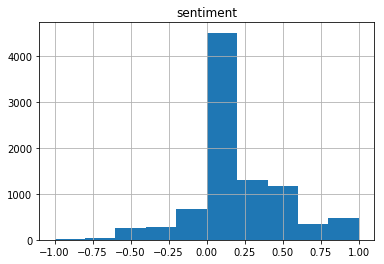

In [58]:
# cat sentiment histogram
df[df['target'] == 1].hist(column='sentiment');

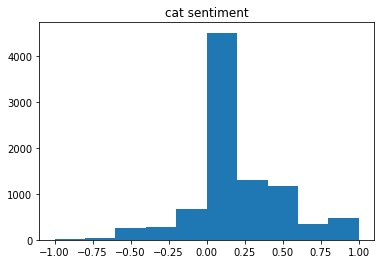

In [59]:
# cat sentiment histogram
cats = df[df['target'] == 1]
plt.hist(cats['sentiment'])
plt.title('cat sentiment');

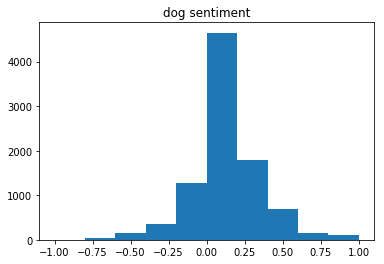

In [60]:
# dog sentiment histogram
dogs = df[df['target'] == 0]
plt.hist(dogs['sentiment'])
plt.title('dog sentiment');

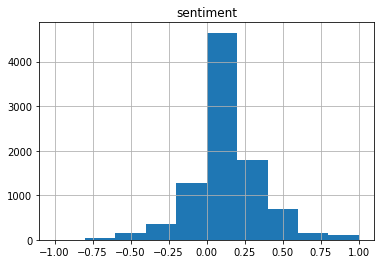

In [61]:
# dog sentiment histogram
df[df['target'] == 0].hist(column='sentiment');

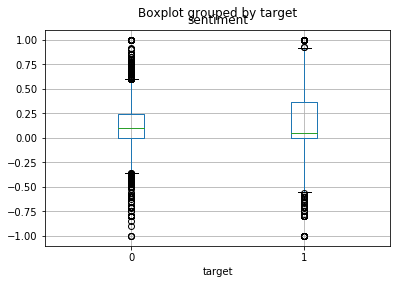

In [62]:
df.boxplot(column='sentiment', by='target');

In [63]:
print('cat mean sentiment:', df[df['target'] == 1].sentiment.mean())
print('dog mean sentiment:', df[df['target'] == 0].sentiment.mean())
print('')
print('cat median sentiment:', df[df['target'] == 1].sentiment.median())
print('dog median sentiment:', df[df['target'] == 0].sentiment.median())

cat mean sentiment: 0.16820476079616284
dog mean sentiment: 0.12010280285912582

cat median sentiment: 0.050432900432900434
dog median sentiment: 0.09659090909090909
